In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               FuncFormatter,
                               AutoMinorLocator)
import numpy as np

#### Load data

In [341]:
data = pd.read_csv("population_sizes.csv")

In [342]:
data.head()

,report_month,churn,gain,total,registrations
0,2009-01-01,0.0,24.0,0.0,11946
1,2009-02-01,2.0,14.0,24.0,12049
2,2009-03-01,3.0,4.0,36.0,11697
3,2009-04-01,3.0,4.0,37.0,9582
4,2009-05-01,2.0,3.0,38.0,10052


In [343]:
len(data)

156

# 1) számoljatok ki mutatószámokat, amik leírják / magyarázzák a jelenséget! Válasszatok megfelelő aggregációs szintet!

- churn rate
- conversion rate
- regisztrációk növekedési üteme
- ami még eszetekbe jut

A churn és conversion rate-et meg lehet határozni az összes aktív regisztrációhoz képest és az adott hónapban regisztrálólókhoz képest is. A regisztrálók növekedési ütemét az összes aktív regisztrációhoz képesti arányszámként határozom meg

In [344]:
data = data.assign(
    user_count = lambda x:x.registrations.cumsum(),
    reg_rate_per_user = lambda x: x.registrations / x.user_count,
    churn_rate_per_reg = lambda x: x.churn / x.registrations,
    churn_rate_per_user = lambda x: x.churn / x.user_count,
    conv_rate_per_reg = lambda x: x.gain / x.registrations,
    conv_rate_per_user = lambda x:x.gain / x.user_count,
    reg_delta = lambda x: x.registrations / x.registrations.shift(1),
    churn_delta = lambda x: x.churn / x.churn.shift(1),
    gain_delta = lambda x: x.gain / x.gain.shift(1),
    date = lambda x: pd.to_datetime(x.report_month),
    year = lambda x: x.date.dt.year,
    month = lambda x: x.date.dt.month,
    net_gain = lambda x: x.gain - x.churn,
    churn_rate_per_user_1 = lambda x: x.churn_rate_per_user + 0.000001 
)

In [345]:
data.head()

,report_month,churn,gain,total,registrations,user_count,reg_rate_per_user,churn_rate_per_reg,churn_rate_per_user,conv_rate_per_reg,conv_rate_per_user,reg_delta,churn_delta,gain_delta,date,year,month,net_gain,churn_rate_per_user_1
0,2009-01-01,0.0,24.0,0.0,11946,11946,1.000000,0.000000,0.000000,0.002009,0.002009,NaN,NaN,NaN,2009-01-01,2009,1,24.0,0.000001
1,2009-02-01,2.0,14.0,24.0,12049,23995,0.502146,0.000166,0.000083,0.001162,0.000583,1.008622,inf,0.583333,2009-02-01,2009,2,12.0,0.000084
2,2009-03-01,3.0,4.0,36.0,11697,35692,0.327720,0.000256,0.000084,0.000342,0.000112,0.970786,1.500000,0.285714,2009-03-01,2009,3,1.0,0.000085
3,2009-04-01,3.0,4.0,37.0,9582,45274,0.211645,0.000313,0.000066,0.000417,0.000088,0.819184,1.000000,1.000000,2009-04-01,2009,4,1.0,0.000067
4,2009-05-01,2.0,3.0,38.0,10052,55326,0.181687,0.000199,0.000036,0.000298,0.000054,1.049050,0.666667,0.750000,2009-05-01,2009,5,1.0,0.000037


In [346]:
data.dtypes

report_month                     object
churn                           float64
gain                            float64
total                           float64
registrations                     int64
user_count                        int64
reg_rate_per_user               float64
churn_rate_per_reg              float64
churn_rate_per_user             float64
conv_rate_per_reg               float64
conv_rate_per_user              float64
reg_delta                       float64
churn_delta                     float64
gain_delta                      float64
date                     datetime64[ns]
year                              int32
month                             int32
net_gain                        float64
churn_rate_per_user_1           float64
dtype: object

# 2) ábrázoljátok a populáció dinamikáit!
legyetek igényesek! Ábra cím, tengelyfelirat, elrendezés, skálázás mind fontos. 



##### a) Plot - Élő regisztrált és előfizető fiókok száma log skálán

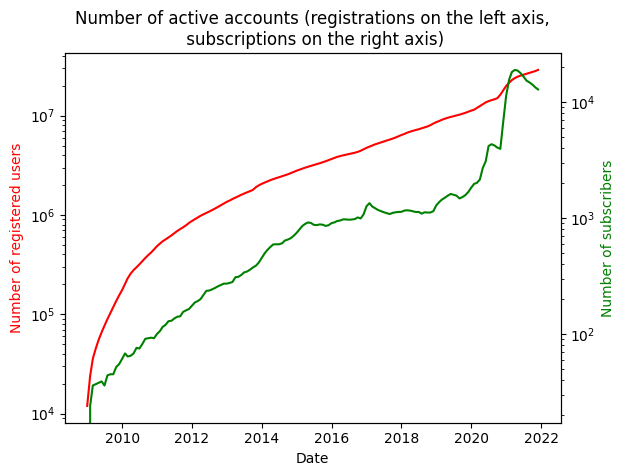

In [347]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["user_count"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of registered users",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax1.set_title("Number of active accounts (registrations on the left axis,\n subscriptions on the right axis)")
ax1.set_yscale('log')
ax2 = ax1.twinx()
ax2.plot(data["date"],data["total"], color = "green")
ax2.set_ylabel("Number of subscribers",color = "green")
ax2.set_yscale('log')
plt.show()

##### b) Plot - Havi új regisztrációk száma illetve aránya a összes regisztrált számához képest

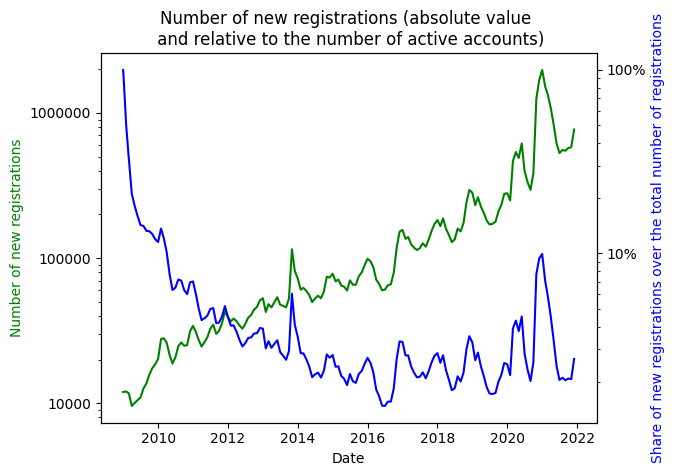

In [348]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["registrations"],color = "green")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of new registrations",color = "green")
ax1.set_title("Number of new registrations (absolute value \n and relative to the number of active accounts)")
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax2 = ax1.twinx()
ax2.plot(data["date"],data["reg_rate_per_user"], color = "blue")
ax2.set_ylabel("Share of new registrations over the total number of registrations",color = "blue")
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

##### c) Plot - Conversion rate and churn rate on a log scale

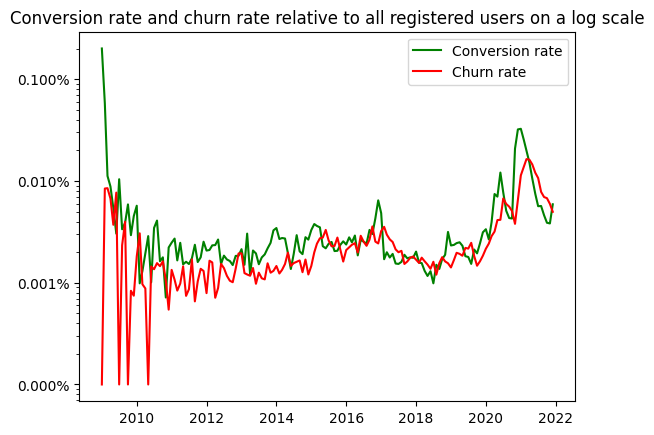

In [349]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_user"],color = "green",label = "Conversion rate")
ax1.plot(data["date"],data["churn_rate_per_user_1"], color = "red",label = "Churn rate")
ax1.set_yscale('log')
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.6f'))
ax1.set_title("Conversion rate and churn rate relative to all registered users on a log scale")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.3%}'.format(y)))
plt.legend()
# Displaying the plot
plt.show()

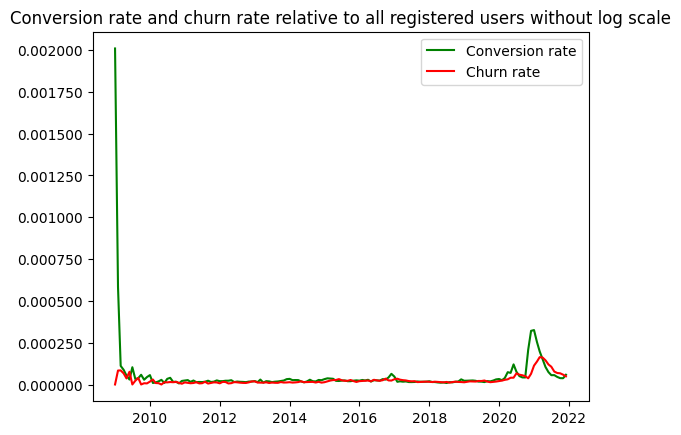

In [350]:
# On a non-log scale:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_user"],color = "green",label = "Conversion rate")
ax1.plot(data["date"],data["churn_rate_per_user_1"], color = "red",label = "Churn rate")
#ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.6f'))
ax1.set_title("Conversion rate and churn rate relative to all registered users without log scale")
plt.legend()
# Displaying the plot
plt.show()

##### d) Plot - Conversion rate and churn rate on a log scale relative to the number of registrations in a given month

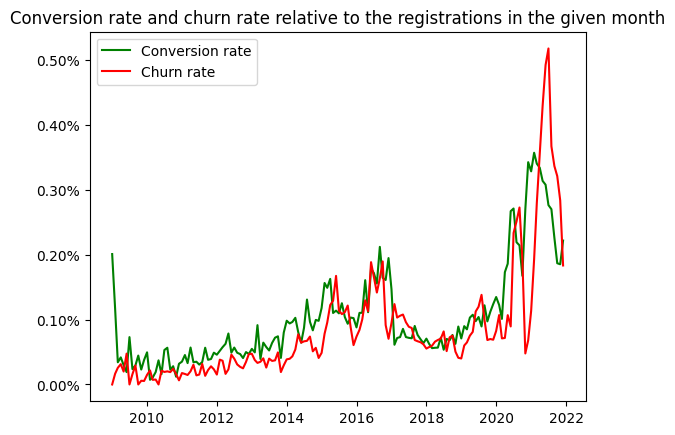

In [351]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_reg"],color = "green",label = "Conversion rate")
ax1.plot(data["date"],data["churn_rate_per_reg"], color = "red",label = "Churn rate")
#ax1.set_yscale('log')
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.6f'))
ax1.set_title("Conversion rate and churn rate relative to the registrations in the given month")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
plt.legend()
# Displaying the plot
plt.show()

# 4) Jelezzétek előre a 2022.01.01-t követő 12 hónap növekedését havi szinten!
A churn, a gain, a total és a registrations is érdekel!
Milyen metrika szerint érdemes értékelni?

Lehet, hogy full faszság, de a regisztrációk és a lemorzsolódók arányával/számával hülyeségnek tűnik az előfizetések arányát prediktálni, mivel azok nincsenek meg 2022-re. Itt az órai kódokat fogom használni kreativitás hiányában, valamilyen polinomiális függvény illesztésével. Lehetne idősoros modelleket is csinálni, ezeknek ebben az esetben valszeg több értelmük lenne, de azokhoz nem értek és ennek a mókolásnak úgysem lesz sok értelme.

In [352]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [353]:
# Az időt simán a hónapok sorszáma fogja jelenteni
data["month_counter"] = range(1, len(data) + 1)

In [354]:
data.columns

Index(['report_month', 'churn', 'gain', 'total', 'registrations', 'user_count',
       'reg_rate_per_user', 'churn_rate_per_reg', 'churn_rate_per_user',
       'conv_rate_per_reg', 'conv_rate_per_user', 'reg_delta', 'churn_delta',
       'gain_delta', 'date', 'year', 'month', 'net_gain',
       'churn_rate_per_user_1', 'month_counter'],
      dtype='object')

#### Dummy adat óráról
Csak hogy lássam mi a fasz van

In [360]:
# true data generating process
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# for reproducibility, the random numbers will be the same
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

In [361]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [362]:
polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
)

In [363]:
scores

array([-0.25174939, -0.04193604, -0.02725282, -0.02934695, -0.00485939,
       -0.00487645, -0.01858739, -0.03843547, -0.01218562, -0.00285797])

In [364]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

#### Chess.com-os adat

In [365]:
#This is irrelevant
data = data.assign(

    reg_lag_1= lambda x: x.registrations.shift(1),
    reg_lag_2= lambda x: x.registrations.shift(2),

    gain_lag_1= lambda x: x.gain.shift(1),
    gain_lag_2= lambda x: x.gain.shift(2),

    churn_lag_1= lambda x: x.churn.shift(1),
    churn_lag_2= lambda x: x.churn.shift(2),

    total_lag_1= lambda x: x.total.shift(1),
    total_lag_2= lambda x: x.total.shift(2)


)

In [366]:
#feature_cols = [col for col in data.columns[19:28]]
# Nem tudok lag-eket használni, ha nem léteznek ezek a változók a predikált időszakban :(. 
# Valszeg meg lehetne csinálni, hogy folyamatosan prediktálok csak egy hónapot, de ahhoz sajnos későn kezdtem el a házit. Ezért csak az idővel fogok prediktálni
feature_cols = ["month_counter"]
feature_cols

['month_counter']

In [367]:
date_list_for_pred = ["2022-" + str(month) + "-01" for month in range(1,13)]
date_list_for_pred

['2022-1-01',
 '2022-2-01',
 '2022-3-01',
 '2022-4-01',
 '2022-5-01',
 '2022-6-01',
 '2022-7-01',
 '2022-8-01',
 '2022-9-01',
 '2022-10-01',
 '2022-11-01',
 '2022-12-01']

In [368]:
# For the sake of simplicity I try only the 6th order polynomial. I tried others as well but this is the funniest
pred_df = pd.DataFrame({"month_counter":np.array(range(157,157+12)),
                        "date":pd.to_datetime(date_list_for_pred)})
outcomes = ["gain","churn","total","registrations"]
for outcome in outcomes:
    X = data.loc[:,feature_cols].to_numpy()
    #X = X.dropna()

    y = data.loc[:,outcome].to_numpy()
    polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
    )
    pipeline.fit(X,y)
    x_test = np.array(range(157,157+12))
    pred_df[outcome+"_pred"] = pipeline.predict(x_test[:,np.newaxis])
        
    

In [369]:
pred_df


,month_counter,date,gain_pred,churn_pred,total_pred,registrations_pred
0,157,2022-01-01,1646.655027,2669.894823,19841.524707,683871.482473
1,158,2022-02-01,1416.381833,2735.263126,20969.871859,632861.460143
2,159,2022-03-01,1147.708959,2794.415860,22137.957107,572817.863176
3,160,2022-04-01,837.717416,2846.558464,23346.042945,503060.677908
4,161,2022-05-01,483.356014,2890.853542,24594.345790,422879.435454
5,162,2022-06-01,81.437899,2926.419633,25883.033880,331532.419785
6,163,2022-07-01,-371.362957,2952.329965,27212.225152,228245.866466
7,164,2022-08-01,-878.515306,2967.611196,28581.985076,112213.152060
8,165,2022-09-01,-1443.634217,2971.242135,29992.324472,-17406.025813
9,166,2022-10-01,-2070.484703,2962.152450,31443.197279,-161486.477751


In [370]:
frames = [data[["date","month_counter"]+outcomes],pred_df]
plot_df = pd.concat(frames)

In [371]:
plot_df

,date,month_counter,gain,churn,total,registrations,gain_pred,churn_pred,total_pred,registrations_pred
0,2009-01-01,1,24.0,0.0,0.0,11946.0,NaN,NaN,NaN,NaN
1,2009-02-01,2,14.0,2.0,24.0,12049.0,NaN,NaN,NaN,NaN
2,2009-03-01,3,4.0,3.0,36.0,11697.0,NaN,NaN,NaN,NaN
3,2009-04-01,4,4.0,3.0,37.0,9582.0,NaN,NaN,NaN,NaN
4,2009-05-01,5,3.0,2.0,38.0,10052.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7,2022-08-01,164,NaN,NaN,NaN,NaN,-878.515306,2967.611196,28581.985076,112213.152060
8,2022-09-01,165,NaN,NaN,NaN,NaN,-1443.634217,2971.242135,29992.324472,-17406.025813
9,2022-10-01,166,NaN,NaN,NaN,NaN,-2070.484703,2962.152450,31443.197279,-161486.477751
10,2022-11-01,167,NaN,NaN,NaN,NaN,-2762.985401,2939.221365,32934.498306,-320938.361189


#### Plot predictions

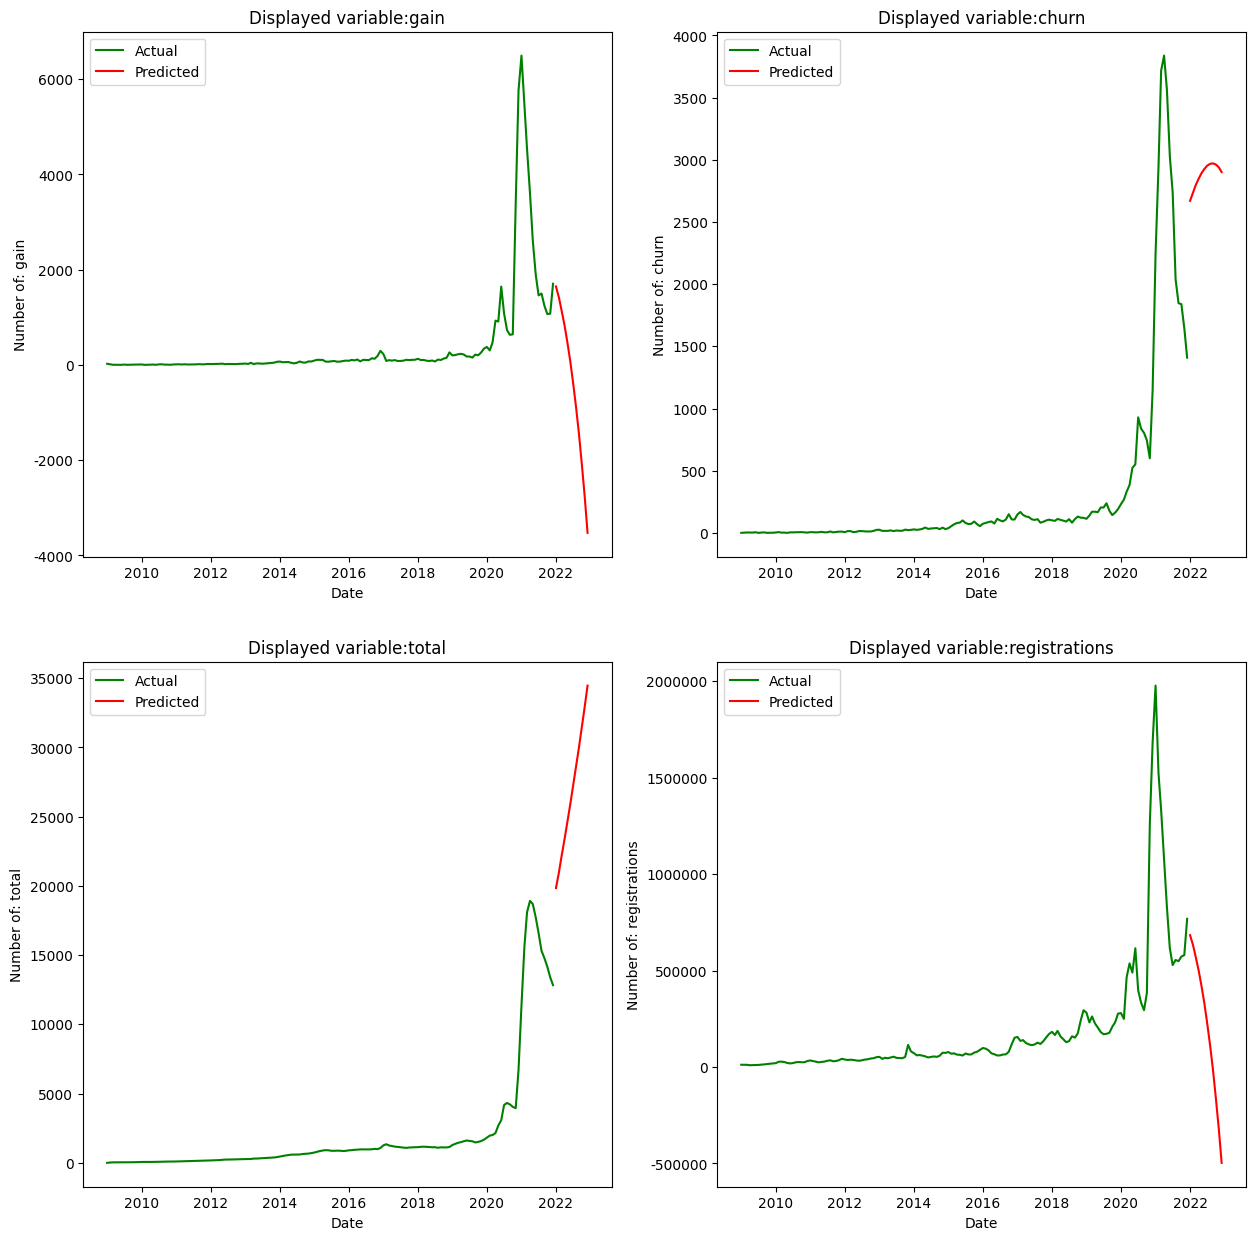

In [372]:
plt.figure(figsize=(15, 15))
counter = 1
for outcome in outcomes:
    ax = plt.subplot(2, 2, counter)
    ax.plot(plot_df["date"],plot_df[outcome],color = "green",label = "Actual")
    ax.plot(plot_df["date"],plot_df[outcome + "_pred"],color = "red",label = "Predicted")
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of: {}".format(outcome))
    ax.set_title("Displayed variable:{}".format(outcome))
    #ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
    plt.legend()
    counter +=1
plt.show()

# 5) A 2021-01-01ig tartó adatok alapján jelezzétek előre a 2021-es évet és validáljátok a modellt!